In [5]:
# % matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from tqdm import tqdm

In [6]:
def GetHisto(l,h = 0.2):
    
    xmin_, xmax_ = np.min(l), np.max(l)
    bines = np.arange(xmin_,xmax_+h,h)
    H, bins = np.histogram(l,bins=bines)
    w = np.diff(bins)
    m = bins[:-1] + 0.5*w[0] # Marcas de clase
    HNorm = H / np.sum(H*w)
    
    return H,HNorm,bins,m,w

In [7]:
def Likelihood(x,mu,std):
    return 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mu)**2/(2*std**2))

In [8]:
def Metropolis( Likelihood, mu_, sigma_, seed_ = 0., delta_ = 1.0, NSteps = int(4e4) ):
    
    x = np.zeros(NSteps)
    x[0] = seed_
    
    accept = 0
    
    for i in tqdm(range(NSteps-1)):
        
        xn = x[i] + np.random.uniform(-delta_,delta_)
        
        alpha = np.minimum( 1., Likelihood(xn,mu_,sigma_)/Likelihood(x[i],mu_,sigma_))
        
        g = np.random.rand()
        
        if g < alpha:
            x[i+1] = xn
            accept += 1
            
        else:
            x[i+1] = x[i]
            
    print( accept/float(NSteps) )
    
    return x

In [10]:
mu = 0.3
sigma = 1.5
x = Metropolis(Likelihood,mu,sigma)

100%|██████████| 39999/39999 [00:01<00:00, 21844.83it/s]

0.869275


In [11]:
H,HNorm,bins,m,w = GetHisto(x)

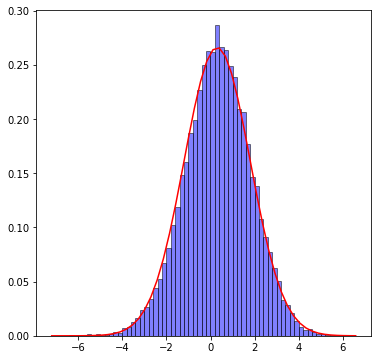

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar(m,HNorm, color='b',width=w,ec='k', alpha=0.5, label='Sample')


xmin_, xmax_ = np.min(x), np.max(x)
t = np.linspace(xmin_, xmax_)
ax.plot(t,Likelihood(t,mu,sigma),color='r')